BR_R002/2021-08-31/split/23KPR00/products/interim/cogs/2014-01-09.tif

BR_R002/2021-08-31/split/23KPR00/products/bas_intermediates/interim/lsma.npy

In [1]:


import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mat_in = sio.loadmat('inputs/Landsat_separate_images_BR_R002.mat')
mat_out = sio.loadmat('outputs/output_BR_R002_23KPR00_2014_01_09_max_iter150_T0.0150.mat')
dates = pd.read_csv('inputs/dates_BR_R002_23KPR00.csv')
#load npy file
lsma_out_raw = np.load('outputs/lsma.npy')

In [3]:
# plot_rand = True
plot_rand = False
if plot_rand:
    # get a random image from mat_in
    import random
    img_key = random.choice([ key for key in mat_in.keys()])# if key.startswith('BH_R001_39RVK60')])
    print(img_key)
    img_key = 'BR_R002_23KPR00_2014_01_09'
    rand_img = mat_in[img_key]

    # Normalize the original image for visualization purposes
    image_min = np.min(rand_img)
    image_max = np.max(rand_img)
    normalized_image = (rand_img - image_min) / (image_max - image_min)

    # Create a true-color composite
    true_color = np.stack([normalized_image[:, :, 4],  # Red
                           normalized_image[:, :, 2],  # Green
                           normalized_image[:, :, 1]],  # Blue
                      axis=-1)

    fig, axes = plt.subplots(1, 1, figsize=(5, 5))

    # Plot the true-color composite
    ax = axes
    ax.imshow(true_color)
    ax.set_title('True-Color Composite')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [29]:

def normalize(img):
    img_min = np.min(img)
    img_max = np.max(img)
    return (img - img_min) / (img_max - img_min)

region = 'BR_R002_23KPR00_2014_01_09'

# Get source image
img_in = normalize(mat_in[region])
# Create a true-color composite
true_color = np.stack([img_in[:, :, 4],  # Red
                       img_in[:, :, 2],  # Green
                       img_in[:, :, 1]],  # Blue
                      axis=-1)
# MVCNM output
Aest = mat_out['Aest']
sest = mat_out['sest']
height, width = img_in.shape[:2]
num_endmembers = Aest.shape[1]
abundance_maps = np.reshape(sest.T, (height, width, num_endmembers), order='F')

# LSMA output
# Choose a run from lsma_out to compare with your results
lsma_index = dates.date[dates.date == '2014-01-16'].index[0]
lsma_out = lsma_out_raw[lsma_index]
abundance_bands = [7, 8, 9, 10]
lsma_out = lsma_out[:, :, abundance_bands]
lsma_abundance_maps = normalize(lsma_out)
# Number of endmembers for lsma
num_endmembers_lsma = lsma_abundance_maps.shape[-1]

# Print shapes
print(f"img_in.shape: {img_in.shape}")
print(f"true_color.shape: {true_color.shape}")
print(f"Aest.shape: {Aest.shape}")
print(f"sest.shape: {sest.shape}")
print(f"abundance_maps.shape: {abundance_maps.shape}")
print(f"lsma_abundance_maps.shape: {lsma_abundance_maps.shape}")
print(f"num_endmembers: {num_endmembers}")
print(f"num_endmembers_lsma: {num_endmembers_lsma}")

img_in.shape: (165, 225, 8)
true_color.shape: (165, 225, 3)
Aest.shape: (8, 5)
sest.shape: (5, 37125)
abundance_maps.shape: (165, 225, 5)
lsma_abundance_maps.shape: (165, 225, 4)
num_endmembers: 5
num_endmembers_lsma: 4


In [71]:
# def calculate_subplot_arrangement(num_endmembers):
#     rows = 1
#     columns = num_endmembers
#     factors = [i for i in range(1, num_endmembers + 1) if num_endmembers % i == 0]
#     for f in factors:
#         if f <= 3:
#             rows = f
#             columns = num_endmembers // f
#     return rows, columns

# def optimal_figsize(rows, cols):
#     aspect_ratio = cols / rows
#     if aspect_ratio >= 2:
#         base_size = (4, 3)
#     elif rows == 1:
#         base_size = (5, 4)
#     else:
#         base_size = (4, 3)
#     return (base_size[0] * cols, base_size[1] * rows)



# def plot_abundance_maps(abundance_maps, title_prefix, num_endmembers, axes, fig, bands=None):
#     for i in range(num_endmembers):
#         ax = axes[i]
#         im = ax.imshow(abundance_maps[:, :, i], cmap='viridis', vmin=0, vmax=1)
#         if bands:
#             title = f"{title_prefix} {bands.pop(0)} abundance"
#         else:
#             title = f"{title_prefix} Abundance #{i + 1}"
#         ax.set_title(title)
#         ax.set_xticks([])
#         ax.set_yticks([])
#         fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# def plot_algorithm_results(abundance_maps, title, num_endmembers, region, bands=None, idx=None):
#     if idx:
#         abundance_maps = abundance_maps[:, :, idx]
    
#     rows, columns = calculate_subplot_arrangement(num_endmembers)
    
#     if rows == 1 and num_endmembers > 3:
#         plots = [3] * (num_endmembers // 3) + [2] * ((num_endmembers % 3) // 2)
#         start = 0
#         for i, cols in enumerate(plots):
#             fig, axes = plt.subplots(1, cols, figsize=optimal_figsize(rows, cols))
#             fig.suptitle(f"{region} - {title} (Part {i + 1})", fontsize=16, y=1.02)
#             plot_abundance_maps(abundance_maps[:, :, start:start+cols], "", cols, axes, fig, bands)
#             fig.tight_layout()
#             plt.show()
#             start += cols
#     else:
#         fig, axes = plt.subplots(rows, columns, figsize=optimal_figsize(rows, columns))
#         fig.suptitle(f"{region} - {title}", fontsize=16, y=1.02)
#         axes = axes.reshape(-1)
#         plot_abundance_maps(abundance_maps, "", num_endmembers, axes, fig, bands)
#         fig.tight_layout()
#         plt.show()

# # Map 1: Vegetation
# # Map 2: Soil
# # Map 3: Asphalt + Concrete
# # Map 4: Water + Shadow (no need to consider cloud)
# # Map 5: Building Materials - Rest man-made paint, glass, solar panel, polymer, metal, ceramic, tile. These are mainly man-made roof materials.

# # Abundance bands
# mvcnmf_bands = ['"Building Materials"', 'Asphalt + Concrete"', '"Water + Shadow"', '"Vegetation"', '"Soil"']
# mvcnmf_idx = [4, 3, 0, 1, 2]
# lsma_bands = ['"High"', '"Low"', '"Soil"', '"Vegetation"']
# lsma_idx = [2, 3, 0, 1]

# # Plot true image
# # Plot the true-color image
# fig_true_color, ax_true_color = plt.subplots(figsize=(4, 3))
# ax_true_color.imshow(true_color)
# ax_true_color.set_title(f'{region} - True-Color Composite')
# ax_true_color.set_xticks([])
# ax_true_color.set_yticks([])
# fig_true_color.tight_layout()
# plt.show()

# # Plot your abundance maps
# plot_algorithm_results(abundance_maps, "MVCNMF", num_endmembers, region, bands=mvcnmf_bands, idx=mvcnmf_idx)

# # Plot lsma abundance maps
# plot_algorithm_results(lsma_abundance_maps, "LSMA", num_endmembers_lsma, region, bands=lsma_bands, idx=lsma_idx)


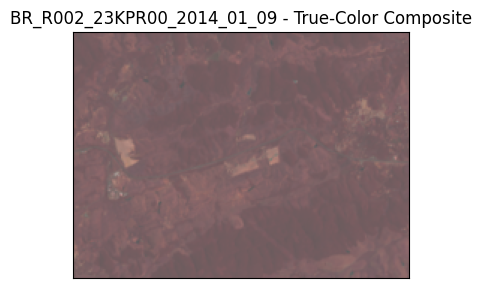

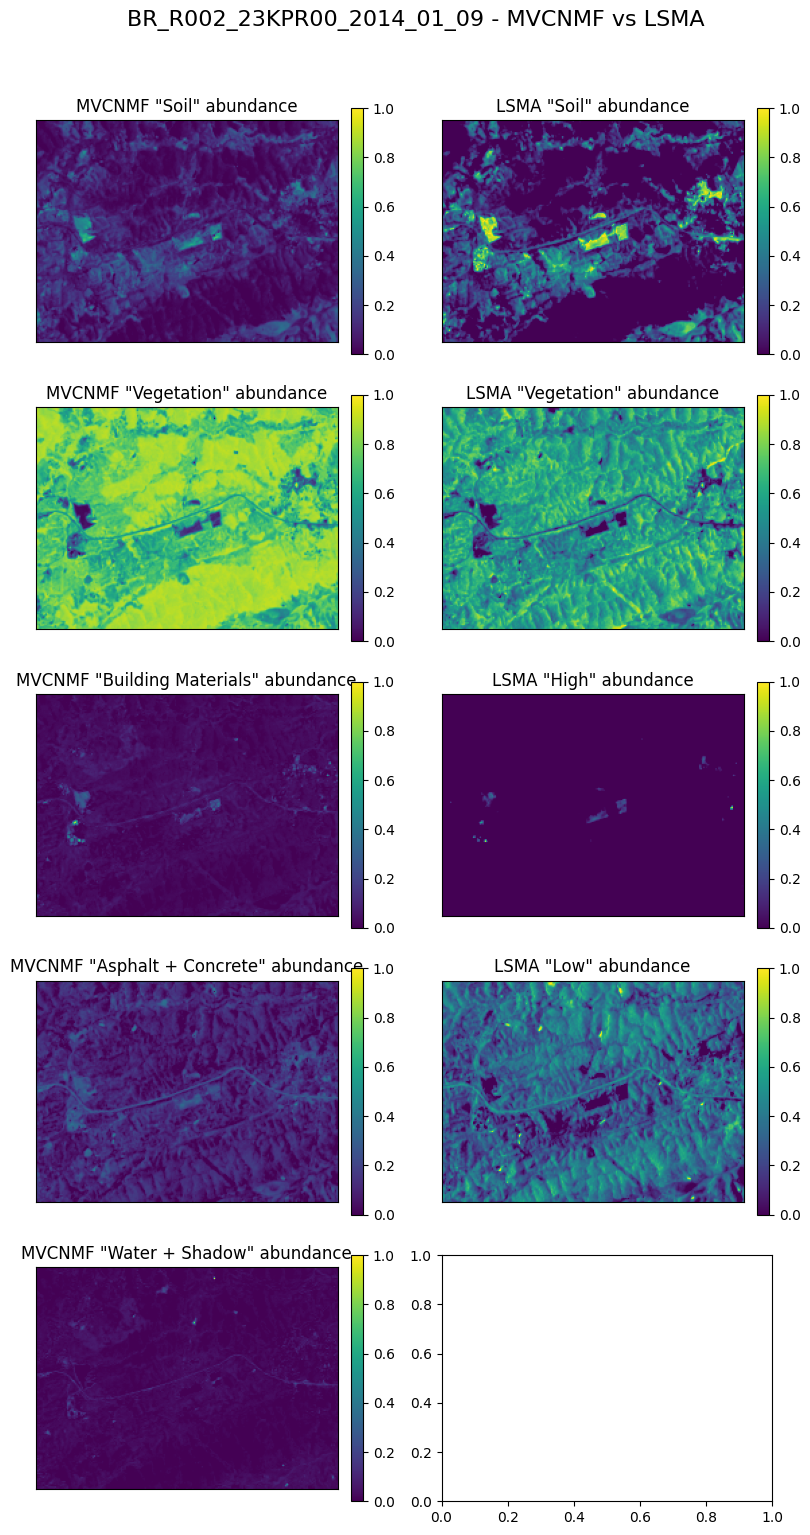

In [78]:
def calculate_subplot_arrangement(num_endmembers):
    rows = 1
    columns = num_endmembers
    factors = [i for i in range(1, num_endmembers + 1) if num_endmembers % i == 0]
    for f in factors:
        if f <= 3:
            rows = f
            columns = num_endmembers // f
    return rows, columns

def optimal_figsize(rows, cols):
    aspect_ratio = cols / rows
    if aspect_ratio >= 2:
        base_size = (4, 3)
    elif rows == 1:
        base_size = (5, 4)
    else:
        base_size = (4, 3)
    return (base_size[0] * cols, base_size[1] * rows)

def plot_abundance_maps(abundance_maps, title_prefix, num_endmembers, axes, fig, bands=None):
    for i in range(num_endmembers):
        ax = axes[i]
        im = ax.imshow(abundance_maps[:, :, i], cmap='viridis', vmin=0, vmax=1)
        if bands:
            title = f"{title_prefix} {bands.pop(0)} abundance"
        else:
            title = f"{title_prefix} Abundance #{i + 1}"
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        
def plot_algorithm_results(abundance_maps_1, title_1, num_endmembers_1, abundance_maps_2, title_2, num_endmembers_2, region, bands_1=None, idx_1=None, bands_2=None, idx_2=None):
    if idx_1:
        abundance_maps_1 = abundance_maps_1[:, :, idx_1]
        if bands_1:
            bands_1 = [bands_1[i] for i in idx_1]
    if idx_2:
        abundance_maps_2 = abundance_maps_2[:, :, idx_2]
        if bands_2:
            bands_2 = [bands_2[i] for i in idx_2]

    rows = max(num_endmembers_1, num_endmembers_2)
    columns = 2
    fig, axes = plt.subplots(rows, columns, figsize=optimal_figsize(rows, columns))
    fig.suptitle(f"{region} - {title_1} vs {title_2}", fontsize=16, y=1.02)

    # Plot abundance maps for Algorithm 1
    for i in range(num_endmembers_1):
        ax = axes[i, 0]
        plot_abundance_maps(abundance_maps_1[:, :, [i]], title_1, 1, [ax], fig, bands_1)

    # Plot abundance maps for Algorithm 2
    for i in range(num_endmembers_2):
        ax = axes[i, 1]
        plot_abundance_maps(abundance_maps_2[:, :, [i]], title_2, 1, [ax], fig, bands_2)

    fig.tight_layout()
    plt.show()

# Map 1: Vegetation
# Map 2: Soil
# Map 3: Asphalt + Concrete
# Map 4: Water + Shadow (no need to consider cloud)
# Map 5: Building Materials - Rest man-made paint, glass, solar panel, polymer, metal, ceramic, tile. These are mainly man-made roof materials.

# Abundance bands
mvcnmf_bands = ['"Building Materials"', '"Water + Shadow"', '"Asphalt + Concrete"', '"Vegetation"', '"Soil"']
mvcnmf_idx = [4, 3, 0, 2, 1]
lsma_bands = ['"High"', '"Low"', '"Soil"', '"Vegetation"']
lsma_idx = [2, 3, 0, 1]

# Plot true image
# Plot the true-color image
fig_true_color, ax_true_color = plt.subplots(figsize=(4, 3))
ax_true_color.imshow(true_color)
ax_true_color.set_title(f'{region} - True-Color Composite')
ax_true_color.set_xticks([])
ax_true_color.set_yticks([])
fig_true_color.tight_layout()
plt.show()

# Call the function with both abundance maps
plot_algorithm_results(abundance_maps, "MVCNMF", num_endmembers, lsma_abundance_maps, "LSMA", num_endmembers_lsma, region, bands_1=mvcnmf_bands, idx_1=mvcnmf_idx, bands_2=lsma_bands, idx_2=lsma_idx)
